# Training

In [16]:
import numpy as np  
from keras.models import Sequential
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [17]:
np.shape(x_train)

(60000, 28, 28)

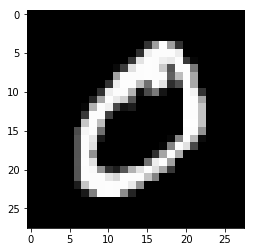

In [18]:
from matplotlib import pyplot as plt
plt.imshow(x_train[1])
plt.gray()

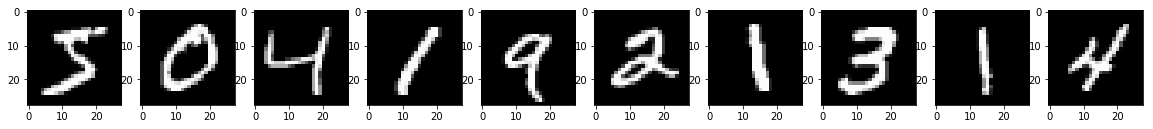

In [19]:
columns = 10
fig = plt.figure(figsize=(20,10))
for i in range(1, columns + 1):
    fig.add_subplot(1, columns, i)
    plt.imshow(x_train[i-1])
plt.gray()

In [20]:
print np.shape(y_train)
y_train = y_train.astype(float)/np.max(y_train)
y_train = np.around(y_train, decimals=1)
y_train[:10]

(60000,)


array([ 0.6,  0. ,  0.4,  0.1,  1. ,  0.2,  0.1,  0.3,  0.1,  0.4])

In [6]:
x_train_1D = x_train.reshape(60000, 28*28)
np.shape(x_train_1D)

(60000, 784)

In [21]:
x_train_1D[0][:]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

### [Keras Sequential model](https://keras.io/getting-started/sequential-model-guide/)
1. [Specifying the input shape and NN structure](https://keras.io/getting-started/sequential-model-guide/#specifying-the-input-shape) - create model
 * [layers](https://keras.io/layers/core/)
 * [activations](https://keras.io/activations/#usage-of-activations) - [sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function)
2. [Compilation](https://keras.io/getting-started/sequential-model-guide/#compilation) - configures the model for training
 * [loss](https://keras.io/losses/)
 * [optimizer](https://keras.io/optimizers/)
 * [metrics](https://keras.io/metrics/)
3. [fit](https://keras.io/getting-started/sequential-model-guide/#training) - trains the model for a dataset with a fixed number of epochs

In [24]:
from keras.layers import Dense

model = Sequential()
model.add(Dense(units=1, input_shape=(28*28,), activation='sigmoid'))
model.compile(loss='mse', optimizer='SGD', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 785       
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________


In [25]:
train_history = model.fit(x=x_train_1D, y=y_train, batch_size=100, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 1s 12us/step - loss: 0.1997 - acc: 0.1458
Epoch 2/10
60000/60000 [==============================] - 1s 11us/step - loss: 0.1445 - acc: 0.1835
Epoch 3/10
60000/60000 [==============================] - 1s 11us/step - loss: 0.1393 - acc: 0.1849
Epoch 4/10
60000/60000 [==============================] - 1s 11us/step - loss: 0.1360 - acc: 0.1841
Epoch 5/10
60000/60000 [==============================] - 1s 12us/step - loss: 0.1345 - acc: 0.1857
Epoch 6/10
60000/60000 [==============================] - 1s 12us/step - loss: 0.1321 - acc: 0.1871
Epoch 7/10
60000/60000 [==============================] - 1s 12us/step - loss: 0.1318 - acc: 0.1874
Epoch 8/10
60000/60000 [==============================] - 1s 12us/step - loss: 0.1304 - acc: 0.1880
Epoch 9/10
60000/60000 [==============================] - 1s 12us/step - loss: 0.1310 - acc: 0.1868
Epoch 10/10
60000/60000 [==============================] - 1s 12us/step - loss: 0.1298 - acc: 0.1877

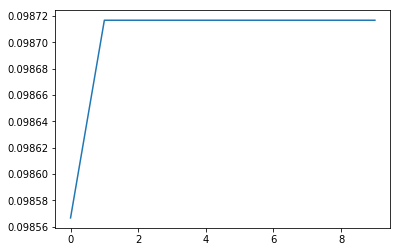

In [39]:
plt.plot(train_history.history['acc'])

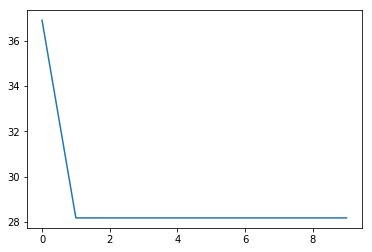

In [40]:
plt.plot(train_history.history['loss'])

# Testing

In [41]:
print x_test.shape
print y_test.shape

(10000, 28, 28)
(10000,)


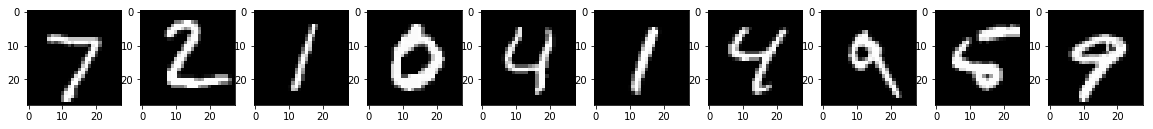

In [42]:
columns = 10
fig = plt.figure(figsize=(20,10))
for i in range(1, columns + 1):
    fig.add_subplot(1, columns, i)
    plt.imshow(x_test[i-1])
plt.gray()

In [43]:
x_test_1D = x_test.reshape(10000, 28*28)

In [45]:
model.predict_classes(x_test_1D[0:10,:])

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]], dtype=int32)

In [47]:
model.evaluate(x=x_test_1D, y=y_test)

10000/10000 [==============================] - 0s 30us/step


[28.129000000000001, 0.098000000000000004]